In [1]:
source("src/plots/plot_effect_surface.R")

## Methods for Estimating Heterogeneous Treatment Effects

### Methods

1. Constant estimate
2. Linear model
3. k-nearest-neighbor
4. Random Forest T-learner
5. (Generalized Random Forests)
6. (Local-Linear Forests)

### Constant estimate

$$\tau(x) = \frac{1}{|\{i: W_i = 1\}|} \sum_{i: W_i = 1} Y_i - \frac{1}{|\{i: W_i = 0\}|} \sum_{i: W_i = 0} Y_i$$

ERROR: Error in persp.default(x, y, z, theta = theta, phi = phi, d = d, expand = expand, : ungültige Grenzen für 'z'


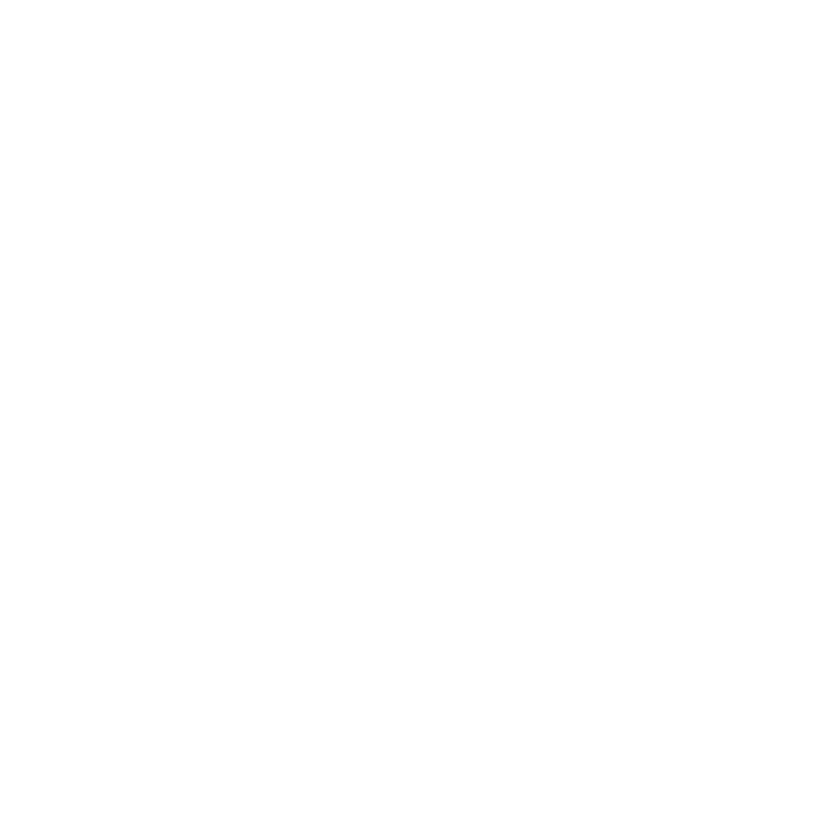

In [57]:
plot_predicted_effect("const", "complex")

### Linear model

#### Model

$$Y_i = \beta_0 + \sum_{j=1}^p \beta_j (X_i)^j + \tau_0 W_i + \sum_{j=1}^p \tau_j W_i (X_i - \bar{X})^j + \text{noise}$$

#### Predictions

Estimate coefficients via ordinary least squares and evaluate model on new data ...


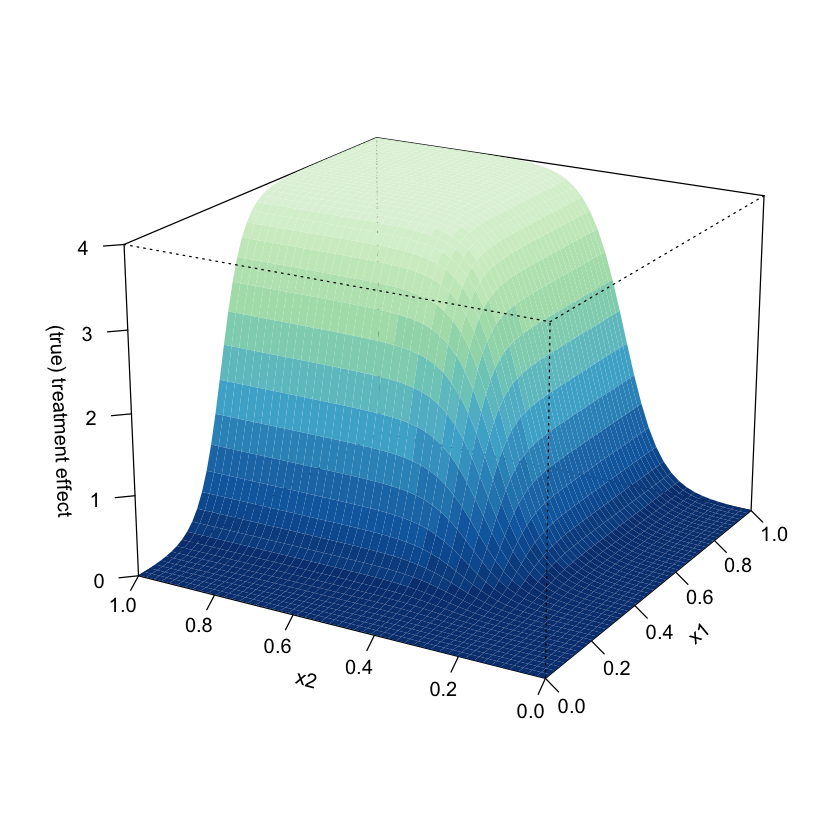

In [6]:
plot_true_effect("complex")

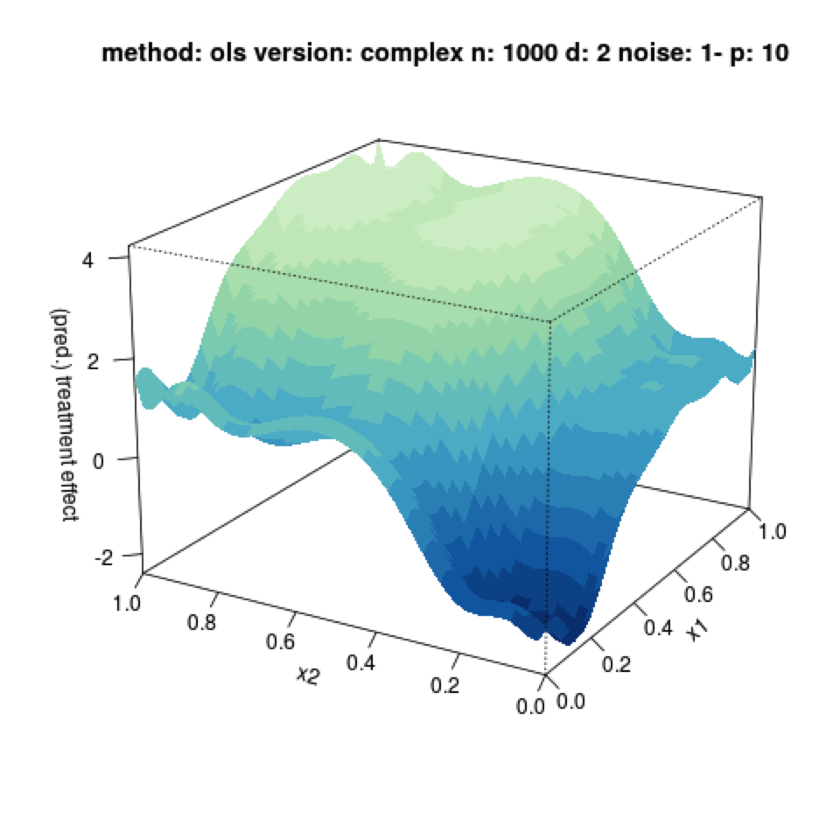

In [5]:
plot_predicted_effect("ols", "complex", p=10)

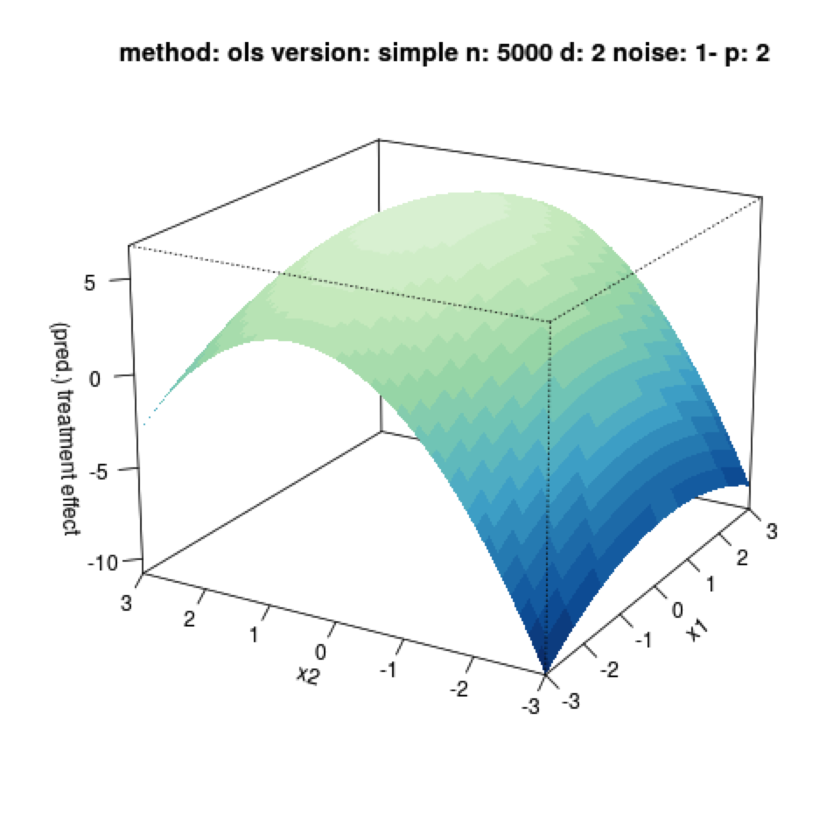

In [7]:
plot_predicted_effect("ols", "simple", p=2, n=5000)

### k-nearest-neighbor

$$\tau_{knn}(x) = \frac{1}{k} \sum_{i \in \mathcal{S}_1(x)} Y_i - \frac{1}{k} \sum_{i \in \mathcal{S}_0(x)} Y_i \,\,,$$
where $\mathcal{S}_1$ and $\mathcal{S}_0$ are the $k$ nearest neighbors to $x$ in the treatment and control samples, respectively.

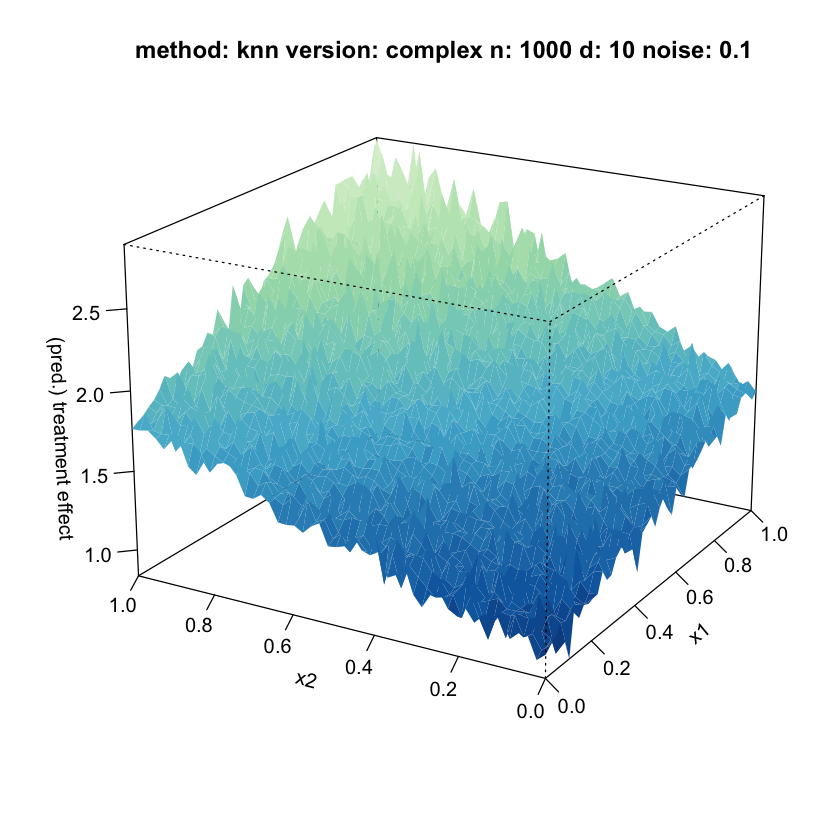

In [10]:
plot_predicted_effect("knn", "complex", k=200, d=10, n=1000, noise_sd=0.1)

In [ ]:
plot_predicted_effect("knn", "simple", k=500, n=10000)

### Random Forest T-learner

Recall: $\tau(x) = \mu_1(x) - \mu_0(x) = \mathbb{E}[Y_i \mid W_i = 1, X_i = x] - \mathbb{E}[Y_i \mid W_i = 0, X_i = x]$.

$$\tau_{RF}(x) = \hat{\mu}_{RF}^{(1)}(x) - \hat{\mu}_{RF}^{(0)}(x) \,\,,$$

where $\hat{\mu}_{RF}^{(w)}(x)$ is the prediction for the "$w$" potential outcome at point x, from a Random Forest that was trained using only data with treatment status $w$.

Note: that the Random Forest algorithm here can be substituted with nearly any other algotihm. In fact, all of the methods mentioned before can be thought of as *T-learner methods*.

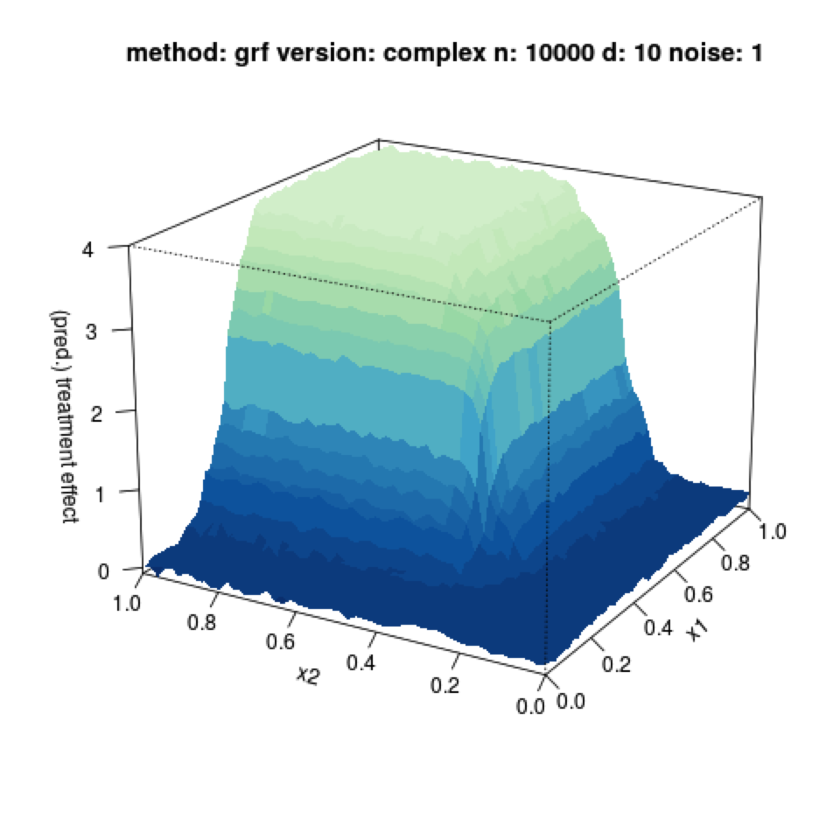

In [17]:
plot_predicted_effect("grf", "complex", n=10000, d=10, noise=1)

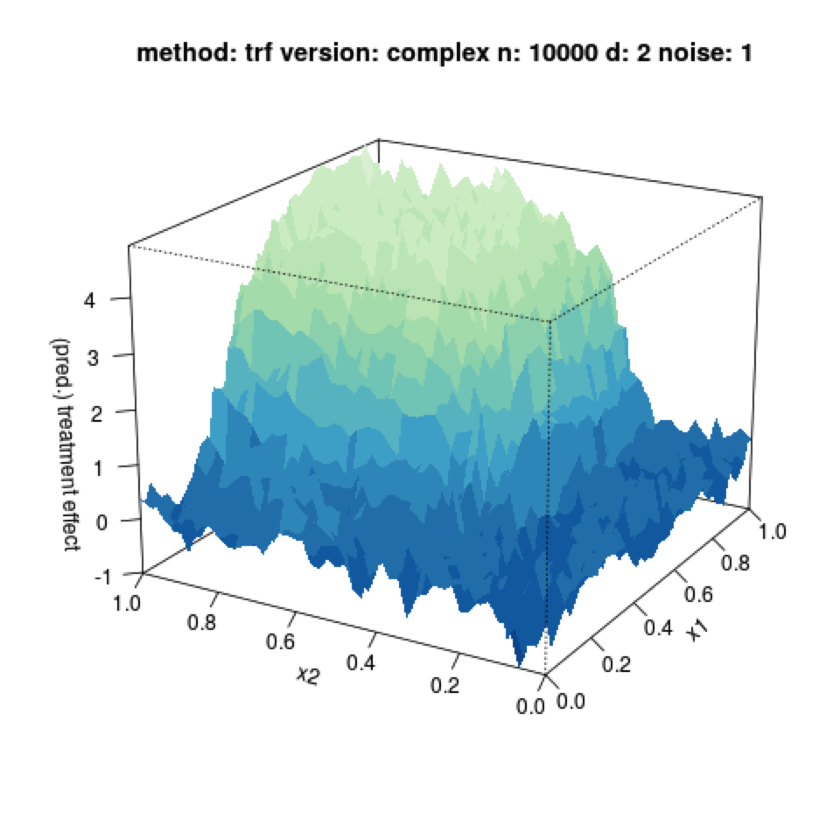

In [15]:
plot_predicted_effect("trf", "complex", n=10000, d=2, noise=1)

In [ ]:
plot_predicted_effect("trf", "boundary", n=5000, d=10)

### Conclusions (so far)

* parametric models perform poorly under model misspecification (duh..)

* non-parametric non-adaptive methods (as k-NN)
    * perform good in small dimensions and bad in large dimensions.
    * for a given neighborhood, estimates the treatment effect directly.

* non-parametric adaptive methods (as RF T-learner)
    * can detect signal in large dimensions, presumably by automatically learning the feature representation
    * instead of estimating the treatment effect function directly, it first estimates the two potential outcome functions, which can potentially be much more complicated. 

### Conclusions (so far)

Ideally, we would like to combine the feature-representation learning capabilities of the Random Forest T-learner, with the direct estimation of the treatment effect function.

$\rightsquigarrow$ Causal Forests, Generalized Random Forests, Local-Linear Forests